# 7576번 토마토 - Silver 1
####  알고리즘 분류 : 그래프 이론 , 그래프 탐색 , 너비 우선 탐색

https://www.acmicpc.net/problem/7576

철수의 토마토 농장에서는 토마토를 보관하는 큰 창고를 가지고 있다. 토마토는 아래의 그림과 같이 격자 모양 상자의 칸에 하나씩 넣어서 창고에 보관한다. 

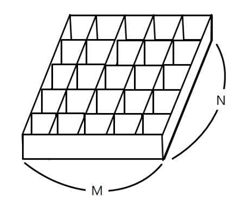

창고에 보관되는 토마토들 중에는 잘 익은 것도 있지만, 아직 익지 않은 토마토들도 있을 수 있다. 보관 후 하루가 지나면, 익은 토마토들의 인접한 곳에 있는 익지 않은 토마토들은 익은 토마토의 영향을 받아 익게 된다. 하나의 토마토의 인접한 곳은 왼쪽, 오른쪽, 앞, 뒤 네 방향에 있는 토마토를 의미한다. 대각선 방향에 있는 토마토들에게는 영향을 주지 못하며, 토마토가 혼자 저절로 익는 경우는 없다고 가정한다. 철수는 창고에 보관된 토마토들이 며칠이 지나면 다 익게 되는지, 그 최소 일수를 알고 싶어 한다.

토마토를 창고에 보관하는 격자모양의 상자들의 크기와 익은 토마토들과 익지 않은 토마토들의 정보가 주어졌을 때, 며칠이 지나면 토마토들이 모두 익는지, 그 최소 일수를 구하는 프로그램을 작성하라. 단, 상자의 일부 칸에는 토마토가 들어있지 않을 수도 있다.

첫 줄에는 상자의 크기를 나타내는 두 정수 M,N이 주어진다. M은 상자의 가로 칸의 수, N은 상자의 세로 칸의 수를 나타낸다. 단, 2 ≤ M,N ≤ 1,000 이다. 둘째 줄부터는 하나의 상자에 저장된 토마토들의 정보가 주어진다. 즉, 둘째 줄부터 N개의 줄에는 상자에 담긴 토마토의 정보가 주어진다. 하나의 줄에는 상자 가로줄에 들어있는 토마토의 상태가 M개의 정수로 주어진다. 정수 1은 익은 토마토, 정수 0은 익지 않은 토마토, 정수 -1은 토마토가 들어있지 않은 칸을 나타낸다.

토마토가 하나 이상 있는 경우만 입력으로 주어진다.

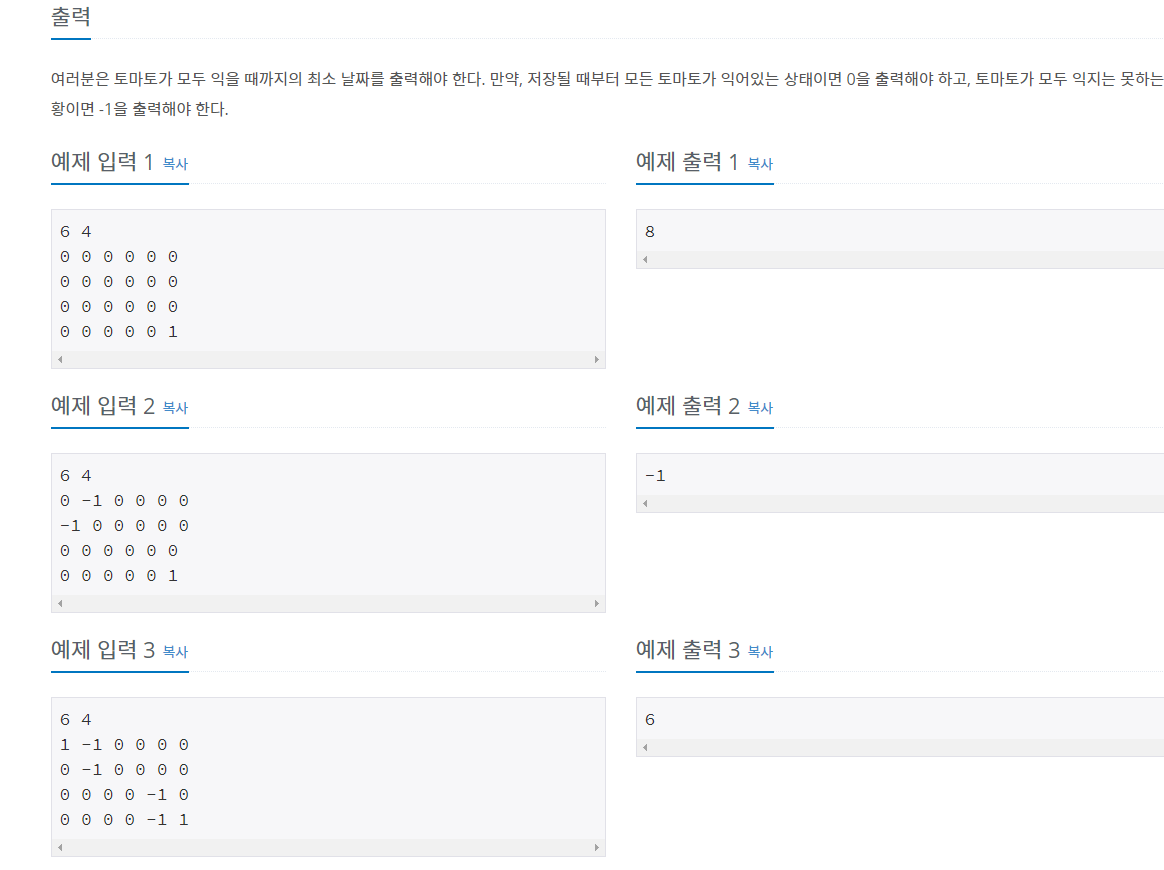

In [ ]:
import sys
from collections import deque

input = sys.stdin.readline
n, m = map(int, input().split())
graph = [list(map(int, input().split())) for _ in range(m)]


if sum([graph[i][j] == 0 for i in range(m) for j in range(n)]):
    result = [[0] * n for _ in range(m)]
    direction = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up down left right


    queue = deque([])
    for i in range(m):
        for j in range(n):
            if graph[i][j] == 1:
                queue.append([i,j])


    visited = [[0] * n for _ in range(m)]
    while queue:
        x, y = queue.popleft()
        visited[x][y] = 1
        for dx, dy in direction:
            x_2, y_2 = x + dx, y + dy
            if 0 <= x_2 < m and 0 <= y_2 < n and visited[x_2][y_2] == 0 and graph[x_2][y_2] == 0:

                result[x_2][y_2] = result[x][y] + 1
                visited[x_2][y_2] = 1
                queue.append((x_2, y_2))

    for i in range(m):
        for j in range(n):
            if result[i][j] == 0 and  graph[i][j] == 0:
                print(-1)
                sys.exit()
    print(max([max(res) for res in result]))
else:
    print(0)
